In [1]:
# Cell 1 – Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib, pandas as pd, numpy as np

In [2]:
df = pd.read_excel("Harvard_Mental_Health_Prediction_Project.xlsx",
                   sheet_name="Feature Engineering")

In [3]:
# Encode categoricals
df_enc = pd.get_dummies(df, columns=["Gender","Academic Year",
                                     "Sleep Category","Stress Bin",
                                     "Study Intensity"], drop_first=True)

X = df_enc.drop(["Is_AtRisk","Student ID","Student Name"], axis=1)
y = (df_enc["Is_AtRisk"] == "Yes").astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

In [4]:
# Pipeline + grid search
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

param_grid = {"rf__n_estimators":[100,200,300],
              "rf__max_depth":[None,5,10]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="f1")
grid.fit(X_train, y_train)

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 824, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 861, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'No'


In [5]:
print("Best params:", grid.best_params_)
print(classification_report(y_test, grid.predict(X_test)))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [7]:
num_cols = ["Age", "GPA", "Study Hours Per Week", "Sleep Hours",
            "Stress Level", "Social Support Score",
            "Depression Score", "Anxiety Score", "Risk Score"]

In [8]:
cat_cols = ["Gender", "Academic Year", "Sleep Category",
            "Stress Bin", "Study Intensity", "Therapy History",
            "Family History"]

In [9]:
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

In [10]:
pipe = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestClassifier(random_state=42))
])


In [11]:
param_grid = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [None, 5, 10]
}


In [12]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="f1")
grid.fit(X_train[num_cols + cat_cols], y_train)

KeyError: "['Gender', 'Academic Year', 'Sleep Category', 'Stress Bin', 'Study Intensity'] not in index"

In [13]:
print("Best params:", grid.best_params_)
print(classification_report(y_test, grid.predict(X_test)))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [14]:
importances = grid.best_estimator_["rf"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:15]
feat_imp.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [15]:
print(df.columns.tolist())

['Sleep Category', 'Stress Bin', 'Risk Score', 'Is_AtRisk', 'Study Intensity', 'Student ID', 'Student Name', 'Age', 'Gender', 'Academic Year', 'GPA', 'Study Hours Per Week', 'Sleep Hours', 'Stress Level', 'Social Support Score', 'Therapy History', 'Family History', 'Depression Score', 'Anxiety Score']


In [16]:
num_cols = [
    "Age", "GPA", "Study Hours Per Week", "Sleep Hours",
    "Stress Level", "Social Support Score",
    "Depression Score", "Anxiety Score", "Risk Score"
]

cat_cols = [
    "Gender", "Academic Year", "Sleep Category",
    "Stress Bin", "Study Intensity",
    "Therapy History", "Family History"
]

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

In [18]:

#  ➜  features & target
X = df[num_cols + cat_cols]
y = (df["Is_AtRisk"] == "Yes").astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

pipe = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestClassifier(random_state=42))
])

param_grid = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [None, 5, 10]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="f1")
grid.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'GPA',
                                                                          'Study '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week',
                                                                          'Sleep '
                                                                          'Hours',
                                                                          'Stress '
                                                                          'Level',
                                                                          'Social '
                                                                          'Support '
                                                                          'Score',
                                                                          'Depression '
                                                                          'Score',
                                                                          'Anxiety '
                                                                          'Score',
                                                                          'Risk '
                                                                          'Score']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Academic '
                                                                          'Year',
                                                                          'Sleep '
                                                                          'Category',
                                                                          'Stress '
                                                                          'Bin',
                                                                          'Study '
                                                                          'Intensity',
                                                                          'Therapy '
                                                                          'History',
                                                                          'Family '
                                                                          'History'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1')

In [20]:
print("Best params:", grid.best_params_)
print(grid.best_score_)

Best params: {'rf__max_depth': None, 'rf__n_estimators': 100}
nan


In [22]:
importances = grid.best_estimator_["rf"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:22]
feat_imp.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 22 Feature Importances")

ValueError: Length of values (22) does not match length of index (16)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 1️⃣ Grab the preprocessing step in the fitted pipeline
prep = grid.best_estimator_.named_steps["prep"]

In [25]:
# 2️⃣ Get the expanded feature names (needs scikit‑learn ≥1.0)
feature_names = prep.get_feature_names_out()

In [26]:
# 3️⃣ Retrieve importances from the RF and align
importances = grid.best_estimator_.named_steps["rf"].feature_importances_
feat_imp = (pd.Series(importances, index=feature_names)
              .sort_values(ascending=True))      # small→big so we can plot horiz

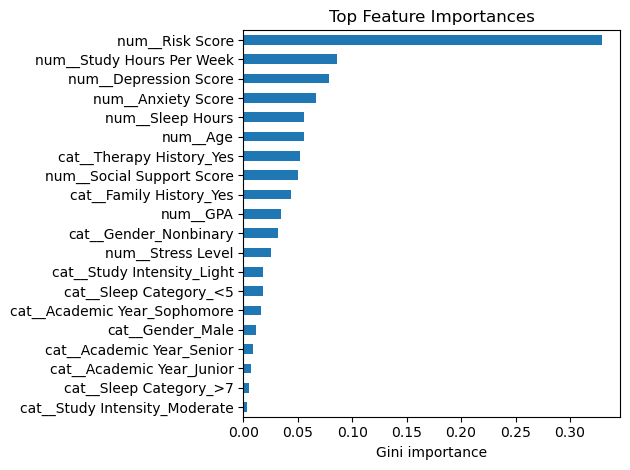

In [27]:
# 4️⃣ Plot top N
N = 20
feat_imp.tail(N).plot(kind="barh")
plt.title("Top Feature Importances")
plt.xlabel("Gini importance")
plt.tight_layout()
plt.show()

In [28]:
ohe = prep.named_transformers_['cat']
ohe_cols = ohe.get_feature_names_out(cat_cols)  # scikit‑learn 1.0+
all_features = np.concatenate([num_cols, ohe_cols])
feat_imp = pd.Series(importances, index=all_features)

In [ ]:
# ---------- Accuracy ----------
train_acc = rf.score(X_train, y_train)          # or accuracy_score(y_train, rf.predict(X_train))
test_acc  = rf.score(X_test,  y_test)           # or accuracy_score(y_test,  rf.predict(X_test))

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test  accuracy: {test_acc:.3f}")